<a href="https://colab.research.google.com/github/HimanshuTirole-22/Machine-Learning/blob/main/Q3_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Reading datasaet
df = pd.read_csv('Diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,0,33.6,0.627,50.0,1
1,1,85.0,66.0,29,0,26.6,0.351,31.0,0
2,8,183.0,64.0,0,0,23.3,0.672,32.0,1
3,1,89.0,66.0,23,94,28.1,0.167,21.0,0
4,0,137.0,40.0,35,168,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48,180,32.9,0.171,63.0,0
764,2,122.0,70.0,27,0,36.8,0.340,27.0,0
765,5,121.0,72.0,23,112,26.2,0.245,30.0,0
766,1,126.0,60.0,0,0,30.1,0.349,47.0,1


In [4]:
#data description
df.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                       int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   766 non-null    float64
 2   BloodPressure             767 non-null    float64
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       767 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 54.1 KB


In [6]:
#check for null values and remove
df.isna().any()

Pregnancies                 False
Glucose                      True
BloodPressure                True
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction     True
Age                          True
Outcome                     False
dtype: bool

In [7]:
df.isna().sum()

Pregnancies                 0
Glucose                     2
BloodPressure               1
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    1
Age                         1
Outcome                     0
dtype: int64

In [8]:
df = df.dropna()
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,0,33.6,0.627,50.0,1
1,1,85.0,66.0,29,0,26.6,0.351,31.0,0
2,8,183.0,64.0,0,0,23.3,0.672,32.0,1
3,1,89.0,66.0,23,94,28.1,0.167,21.0,0
4,0,137.0,40.0,35,168,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48,180,32.9,0.171,63.0,0
764,2,122.0,70.0,27,0,36.8,0.340,27.0,0
765,5,121.0,72.0,23,112,26.2,0.245,30.0,0
766,1,126.0,60.0,0,0,30.1,0.349,47.0,1


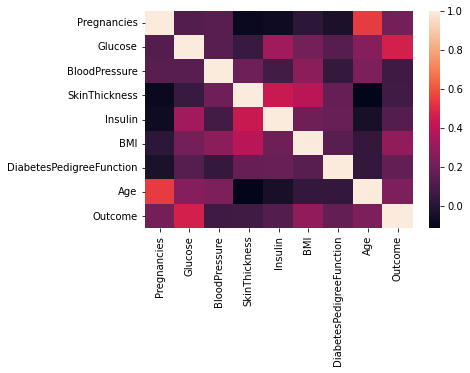

In [9]:
#data visualisation
#correlation between pairs of features
sns.heatmap(df.corr())

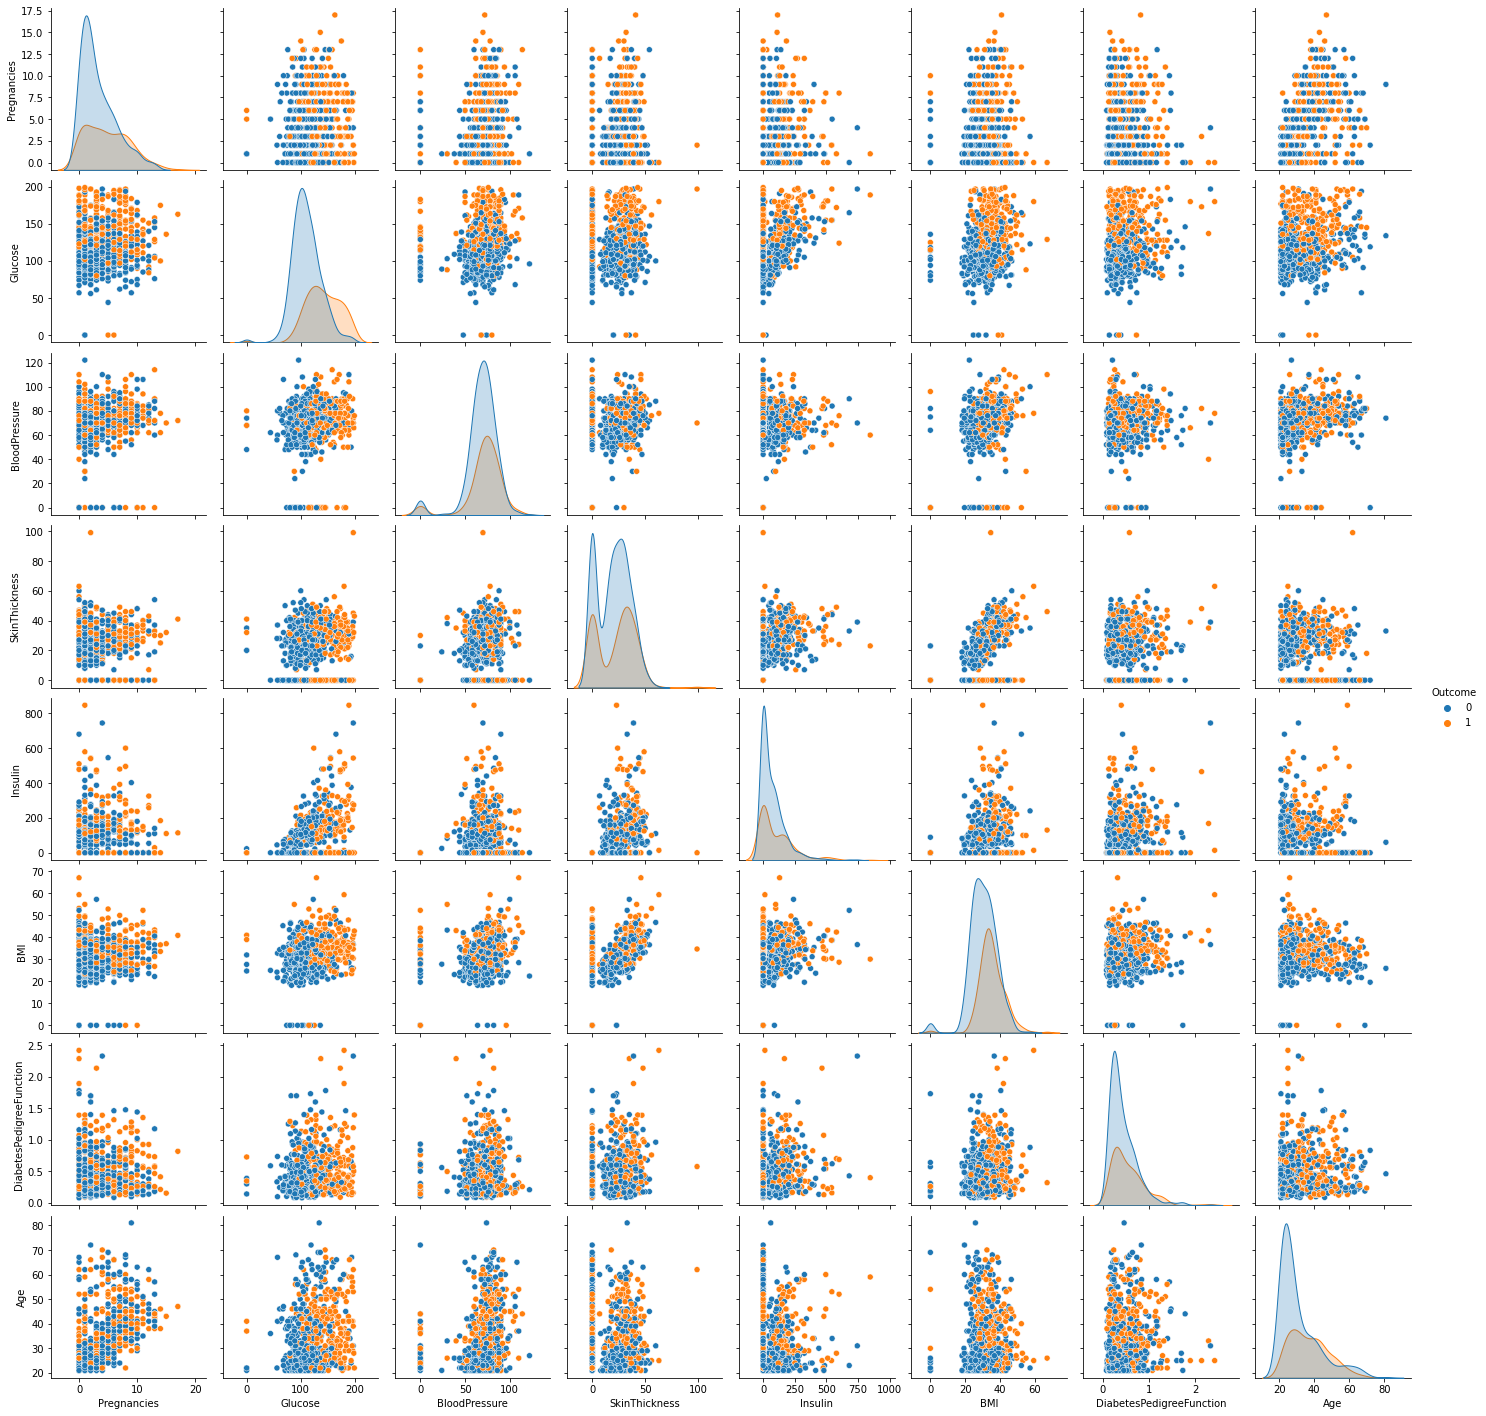

In [10]:
#pairwise realtionships
sns.pairplot(df,hue = 'Outcome')

In [11]:
#split the dataset for training nad testing
X = df.drop('Outcome',axis = 1)
y = df['Outcome']

import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [12]:
#Before implementing classification algorithm, we scale the feature variables
#This function standardize the features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
scaling_x = StandardScaler()
X_train = scaling_x.fit_transform(X_train)
X_test = scaling_x.transform(X_test)

In [13]:
#Training and evaluating model
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
#accuracy
rfc.score(X_test, y_test)

0.7712418300653595

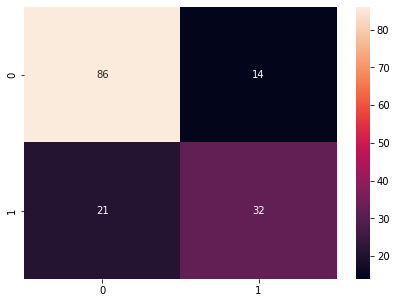

In [14]:
#confusion matrix(evaluation of model)
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(mat, annot=True)

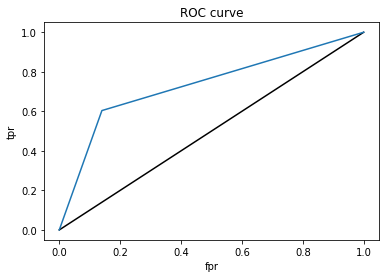

0.7318867924528301

In [15]:
#ROC and AUC plot
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0,1],[0,1],'k-')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

In [16]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
dtc.score(X_test,y_test)

0.7712418300653595

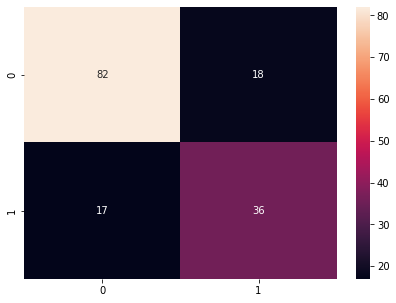

In [17]:
#confusion matrix(evaluation of model)
mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(mat, annot=True)

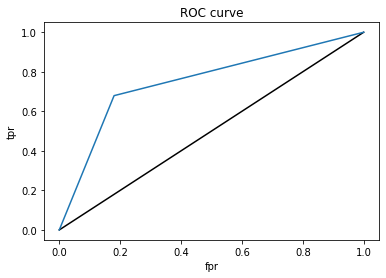

0.7496226415094339

In [18]:
#ROC and AUC plot
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0,1],[0,1],'k-')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)